In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Two player game

# Set board size
n = 3
player0 = 0  # Player 0 plays 0s
player1 = 1  # Player 1 plays 1s

mat = None

# Initialize the board
def initialise_mat():
    global mat
    mat = np.full((n, n), '.')  # Use '.' for empty cells

# Print the board state
def print_state():
    print("\n--- Board ---")
    for row in mat:
        print(" ".join(str(cell) for cell in row))
    print("-------------\n")

# Check if the game has ended
def game_over():
    if np.all(mat != '.'):  # Check if board is full
        matrix = np.where(mat == '.', 0, mat).astype(int)  # Convert to integers
        determinant = np.linalg.det(matrix)
        print_state()
        if determinant == 0:
            print("Player 0 wins! The determinant is 0.")
        else:
            print("Player 1 wins! The determinant is nonzero.")
        return True
    return False

# Validate input
def verify(x, prompt):
    while True:
        try:
            x = int(x)
            if 1 <= x <= n:
                return x
        except ValueError:
            pass
        x = input(prompt)  # Ask again

# Player move
def player_move(player):
    while True:
        print(f"Player {player}'s turn")
        i = verify(input("Enter row: "), "Enter a valid row: ")
        j = verify(input("Enter column: "), "Enter a valid column: ")
        if mat[i-1][j-1] == '.':
            mat[i-1][j-1] = player
            return
        print("This spot is already taken! Try again.")

# Start the game
def start_game():
    print("\nTwo-player mode")

    initialise_mat()
    current_player = player0  # Player 0 starts

    while not game_over():
        print_state()
        player_move(current_player)

        # Swap turns
        current_player = player1 if current_player == player0 else player0

    print("Game Over!")

# Run the game
start_game()



Two-player mode

--- Board ---
. . .
. . .
. . .
-------------

Player 0's turn

--- Board ---
0 . .
. . .
. . .
-------------

Player 1's turn

--- Board ---
0 1 .
. . .
. . .
-------------

Player 0's turn

--- Board ---
0 1 .
. . .
0 . .
-------------

Player 1's turn

--- Board ---
0 1 .
1 . .
0 . .
-------------

Player 0's turn

--- Board ---
0 1 .
1 . .
0 . 0
-------------

Player 1's turn

--- Board ---
0 1 .
1 . .
0 1 0
-------------

Player 0's turn
This spot is already taken! Try again.
Player 0's turn

--- Board ---
0 1 0
1 . .
0 1 0
-------------

Player 1's turn

--- Board ---
0 1 0
1 . 1
0 1 0
-------------

Player 0's turn

--- Board ---
0 1 0
1 0 1
0 1 0
-------------

Player 0 wins! The determinant is 0.
Game Over!


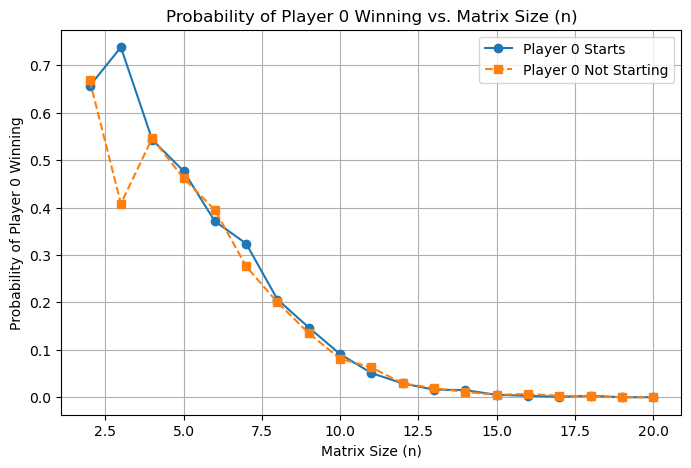

In [4]:
# Simulate matrices

# Simulation Parameters
max_n = 20  # Maximum matrix size to test
num_trials = 1000  # Number of games per matrix size


# Check if Player 0 wins
def player_0_wins(matrix):
    # Check for zero rows or columns
    if any(np.all(row == 0) for row in matrix) or any(np.all(matrix[:, col] == 0) for col in range(len(matrix))):
        return 1

    # Check for repeated rows or columns
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            if np.array_equal(matrix[i], matrix[j]) or np.array_equal(matrix[:, i], matrix[:, j]):
                return 1

    return 0


# Simulate a game where players take turns placing 0s and 1s
def simulate_game(n, player_0_starts):
    matrix = np.full((n, n), -1, dtype=int)  # Fill with -1 for empty entries
    available_positions = [(i, j) for i in range(n) for j in range(n)]
    np.random.shuffle(available_positions)

    for turn, (i, j) in enumerate(available_positions):
        if player_0_starts:
            if turn % 2 == 0:
                current_player = 0
            else:
                current_player = 1

        else:
            if turn % 2 == 0:
                current_player = 1
            else:
                current_player = 0
        matrix[i, j] = current_player
    return player_0_wins(matrix)


# Run simulations for different n values
n_values = np.arange(2, max_n + 1)
prob_0_wins_starting = [sum(simulate_game(n, True) for _ in range(num_trials)) / num_trials for n in n_values]
prob_0_wins_not_starting = [sum(simulate_game(n, False) for _ in range(num_trials)) / num_trials for n in n_values]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_values, prob_0_wins_starting, marker='o', linestyle='-', label='Player 0 Starts')
plt.plot(n_values, prob_0_wins_not_starting, marker='s', linestyle='--', label='Player 0 Not Starting')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Probability of Player 0 Winning')
plt.title('Probability of Player 0 Winning vs. Matrix Size (n)')
plt.legend()
plt.grid(True)
plt.show()
